Index Number : 190280N
Name : Jegakumaran P.

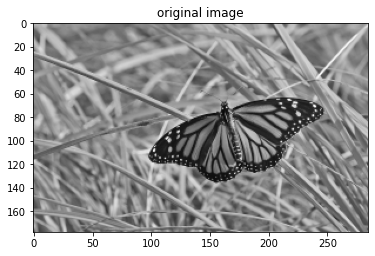

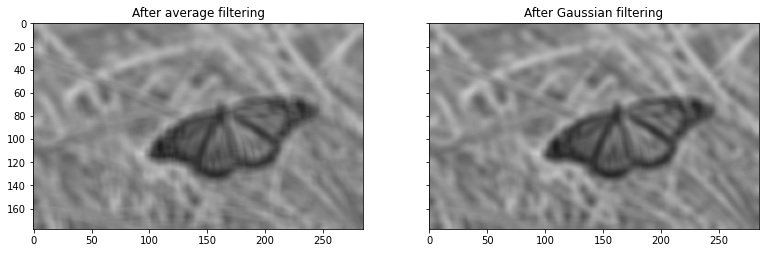

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img=cv.imread(r"Images/butterfly.jpg",cv.IMREAD_REDUCED_GRAYSCALE_4)
assert img is not None
#Average (box) filtering
kernel=np.ones((9,9),np.float32)/81
avg_flt_img=cv.filter2D(img,-1,kernel)

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('image',img)
cv.waitKey(0)
cv.imshow('Average filtered image',avg_flt_img)
cv.waitKey(0)
cv.destroyAllWindows()

#Gaussian Filtering
sigma=4
size =9
gau_flt_img=cv.GaussianBlur(img,(size,size),sigma,cv.BORDER_DEFAULT)
cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow('Gaussian filtered image',gau_flt_img)
cv.waitKey(0)
cv.destroyAllWindows()

#plotting
plt.figure()
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("original image")
plt.show()
fig,ax=plt.subplots(1,2,sharex="all",sharey="all",figsize=(13,13))
ax[0].imshow(cv.cvtColor(avg_flt_img,cv.COLOR_BGR2RGB))
ax[0].set_title("After average filtering")
ax[1].imshow(cv.cvtColor(gau_flt_img,cv.COLOR_BGR2RGB))
ax[1].set_title("After Gaussian filtering")
plt.show()

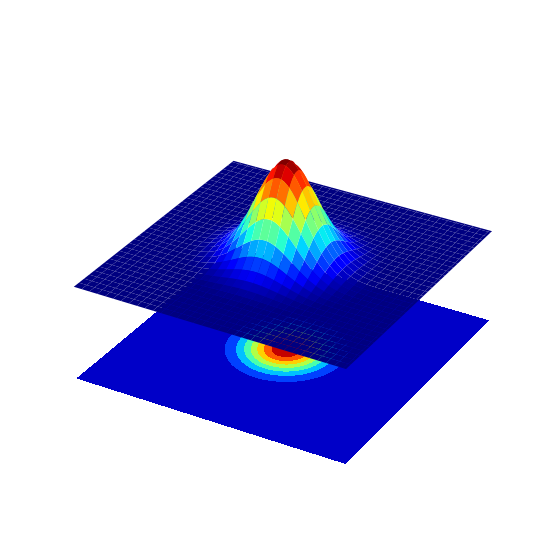

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
sigma =1
step=0.1
x_=np.arange(-5,5+step,step)
y_=np.arange(-5,5+step,step)
xx,yy=np.meshgrid(x_,y_)
z=(1/2*np.pi*sigma**2)*np.exp(-(xx**2+yy**2)/2*sigma**2)
surf=ax.plot_surface(xx,yy,z,cmap=cm.jet,linewidth=0,antialiased=True)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
cset=ax.contourf(xx,yy,z,zdir='z',offset=np.min(z)-1.5,cmap=cm.jet)
ax.set_zlim(np.min(z)-2,np.max(z))
plt.axis('off')
plt.show()

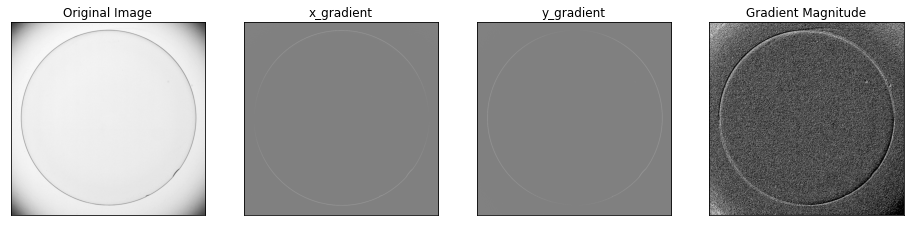

In [14]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread(r'Images/contact_lens.tif',cv.IMREAD_GRAYSCALE)
assert img is not None
kernel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
img_x=cv.filter2D(img,-1,kernel_v)
kernel_h=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
img_y=cv.filter2D(img,-1,kernel_h)
grad_mag=np.sqrt(img_x**2+img_y**2)

cv.imshow('image',img)
cv.waitKey(0)
cv.imshow('x_filtered',img_x)
cv.waitKey(0)
cv.imshow('y_filtered',img_y)
cv.waitKey(0)
cv.destroyAllWindows()

fig,ax=plt.subplots(1,4,sharex='all',sharey='all',figsize=(16,16))
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original Image')
ax[0].set_xticks([]) , ax[0].set_yticks([])
ax[1].imshow(img_x,cmap='gray',vmin=-1020,vmax=1020)
ax[1].set_title('x_gradient')
ax[1].set_xticks([]) , ax[1].set_yticks([])
ax[2].imshow(img_y,cmap='gray',vmin=-1020,vmax=1020)
ax[2].set_title('y_gradient')
ax[2].set_xticks([]) , ax[2].set_yticks([])
ax[3].imshow(grad_mag,cmap='gray')
ax[3].set_title('Gradient Magnitude')
plt.show()
for i in range(4):
    ax[i].axis('off')

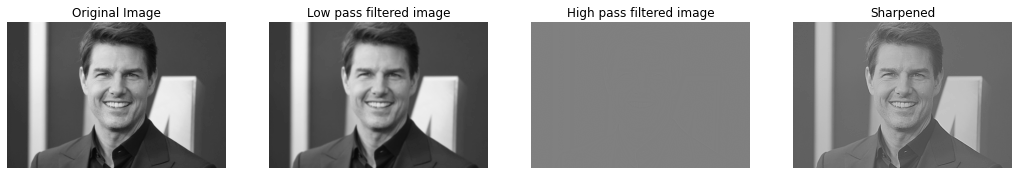

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread(r'Images/tom.jpg',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None
kernel=np.array([(0,-1,0),(-1,2,-1),(0,-1,0)],dtype='float')
sharp_img=cv.filter2D(img,-1,kernel)

sigma=2
gaussian_1d=cv.getGaussianKernel(5,sigma)
img_lp=cv.sepFilter2D(img,-1,gaussian_1d,gaussian_1d)
img_hp=img-img_lp
img_sharp=cv.addWeighted(img,1.0,img_hp,2.0,0)
#plotting
fig,ax=plt.subplots(1,4,sharex='all',sharey='all',figsize=(18,6))
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original Image')
ax[0].set_xticks([]) , ax[0].set_yticks([])
ax[1].imshow(img_lp,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Low pass filtered image')
ax[1].set_xticks([]) , ax[1].set_yticks([])
ax[2].imshow(img_hp,cmap='gray',vmin=-1020,vmax=1020)
ax[2].set_title('High pass filtered image')
ax[2].set_xticks([]) , ax[2].set_yticks([])
ax[3].imshow(img_sharp,cmap='gray')
ax[3].set_title('Sharpened')
for i in range(4):
    ax[i].axis('off')